# Batch Complex Dot Product

## Formula
For matrices A and B of shape (M, N):

$$\text{result}[k] = \sum_{i=0}^{N-1} \text{conj}(A[k,i]) \cdot B[k,i]$$

where $\text{conj}()$ is complex conjugate.

## Description
- Compute dot products between corresponding rows of two complex matrices
- Conjugate elements of A first, then multiply element-wise with B
- Sum along columns for each row
- Output: 1D complex array of length M
- Must be vectorized (no Python loops)

## Key Points
- Engineering convention: conjugate first vector
- Different from `np.vdot()` (flattens arrays)
- Different from `np.inner()` (matrix multiplication)
- Batch operation: process all rows simultaneously

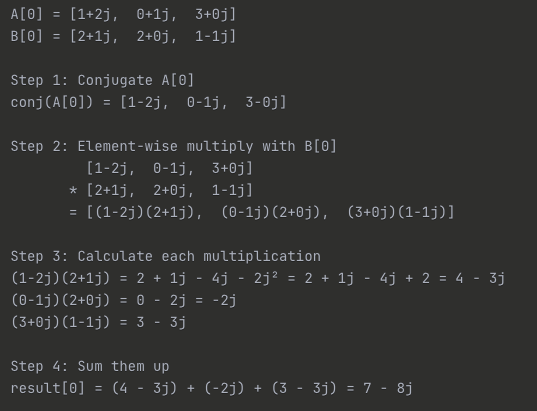

In [1]:
import numpy as np

def batch_compl_vdot(A, B):
    return np.sum(np.conj(A) * B, axis=1)

# 2,3
A = np.array([
    [1+2j, 0+1j, 3+0j],
    [2-1j, 1+1j, 0+2j]
])

# 2,3
B = np.array([
    [2+1j, 2+0j, 1-1j],
    [1+0j, 0-1j, 2+2j]
])

res = batch_compl_vdot(A, B)
print(res)




[7.-8.j 5.-4.j]


In [19]:
# Problem 1: Chain Multiplication and the Trace Trick

A = np.random.rand(5,3)
B= np.random.rand(3,5)
C = np.random.rand(5,5)

A,B,C = [np.round(x*10,1) for x in [A,B,C]]

res = np.trace(A @ B @ C)
# sums the diag elements
res


np.float64(10479.052)

# Einsum on Arrays

In [21]:
a = np.array([1,2,3,4,5])
b = np.array([10, 20, 30, 40, 50]) 
c = np.array([2, 3, 4, 5, 6, 7, 8]) #7

res = np.einsum("i, j->ij",a,c)
res
#5,7 shape outerproduct

array([[ 2,  3,  4,  5,  6,  7,  8],
       [ 4,  6,  8, 10, 12, 14, 16],
       [ 6,  9, 12, 15, 18, 21, 24],
       [ 8, 12, 16, 20, 24, 28, 32],
       [10, 15, 20, 25, 30, 35, 40]])

In [50]:
res = np.einsum("i,i->", a,b)
res

np.int64(550)

In [52]:
res = np.einsum("i, i->i", a,b)
res

array([ 10,  40,  90, 160, 250])

# Einsum on Matrices
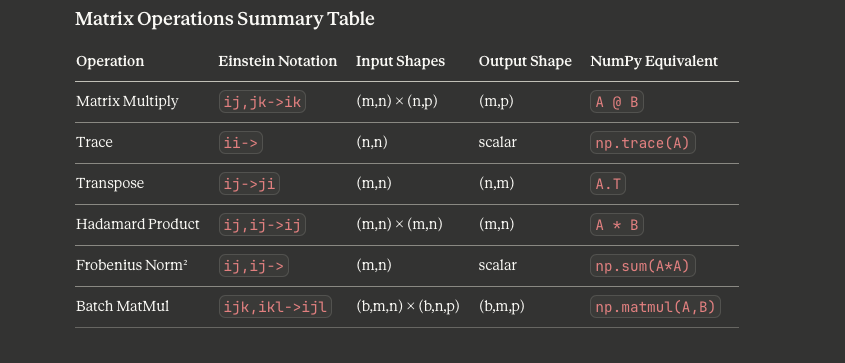

In [57]:

A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])  #(2, 3)

B = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])  #(3, 2)

C = np.array([
    [1, 2],
    [3, 4]
])  #(2, 2)

D = np.array([
    [2, 0],
    [0, 3]
])  #(2, 2)

In [58]:
res = np.einsum("ij,jk->ik", A, B)
# Equivalent: A @ B or np.matmul(A, B)
#2,3 @ 3,2 => 2,2
res

array([[ 58,  64],
       [139, 154]])

In [60]:
res = np.einsum("ii->", C)
# Equivalent: np.trace(C) , 1+4
res

np.int64(5)

In [62]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])     # (2, 3)
result = np.einsum("ij->ji", A)
# Equivalent: A.T
result

array([[1, 4],
       [2, 5],
       [3, 6]])

8. Frobenius Norm (Sum of all squared elements): 

In [64]:
C = np.array([[1, 2],
              [3, 4]])     # (2, 2)

result = np.einsum("ij,ij->", C, C)
# Equivalent: np.sum(C * C)
result

np.int64(30)

## Batch matrix multiplication



In [68]:
# Batch of 2 matrices (2×3 each)
A_batch = np.array([
    [[1, 2, 3],
     [4, 5, 6]],
    
    [[7, 8, 9],
     [10, 11, 12]] #2,2,3
])  
B_batch = np.array([
    [[1, 2],
     [3, 4],
     [5, 6]],
    
    [[7, 8],
     [9, 10],
     [11, 12]]
])  # Shape: (2, 3, 2)

result = np.einsum("ijk,ikl->ijl", A_batch, B_batch)
# Equivalent: np.matmul(A_batch, B_batch)
result.shape

(2, 2, 2)

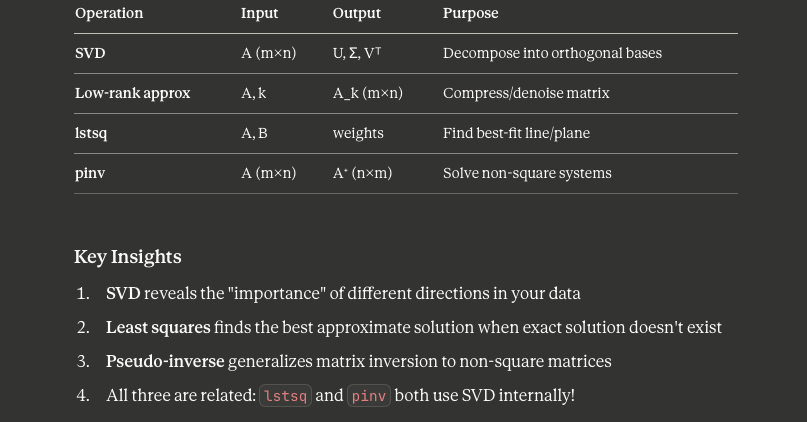

In [72]:
import numpy as np

# Data: 10 observations, 1 feature (plus intercept)
x = np.linspace(0, 10, 10)
A = np.vstack([x, np.ones(len(x))]).T
B = 2 * x + 1 + np.random.randn(10) # y = 2x + 1 + noise

# Solve for weights [m, c]
# lstsq returns: weights, residuals, rank, singular_values
weights, _, _, _ = np.linalg.lstsq(A, B, rcond=None)

m, c = weights
print(f"Fitted Line: y = {m:.2f}x + {c:.2f}")

Fitted Line: y = 1.97x + 1.10


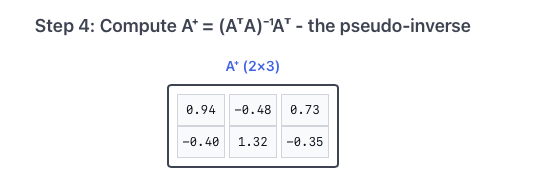
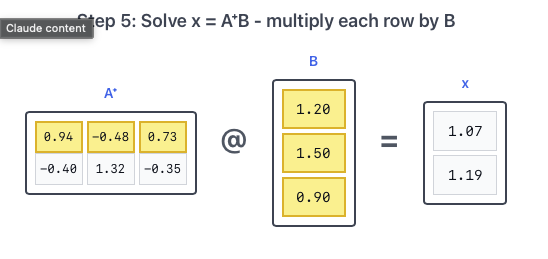

In [70]:
import numpy as np

# Setup a non-square matrix
A = np.random.rand(5, 3)
B = np.random.rand(5)

# 1. Compute Moore-Penrose Pseudo-Inverse
A_pinv = np.linalg.pinv(A)

# 2. Solve for x
x = A_pinv @ B

# 3. Verify the property: A @ A_pinv @ A = A
verification = A @ A_pinv @ A
print("Property holds:", np.allclose(A, verification))

Property holds: True
